## Assignment 4: Computational Code and Output 
##### Group 8 - Sungha Choi
------

#### How do demographic factors, particularly race, education level, and sex correlate with income?

The census income dataset, "Adult," compiled by Barry Becker, explores yearly income. This dataset consists of 15 columns and 32,561 observations, comprising both categorical and continuous variables. There are 9 categorical variables (workclass, education, martial-status, occupation, relationship, race, sex, native-country, and income) including two binary variable (sex and income), and 6 numerical variables in integer format(age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week). Notably, workclass, occupation, and native-country contain missing values.

The question to be explored using the data is: How do demographic factors, particularly race, education level, and sex correlate with income? This dataset would aid in revealing descriptive statistics, such as proportions, given that these variables are categorical, and in visualizing the distribution of each variable to provide deeper insight. Furthermore, it would help build an additive regression model to examine the individual impacts of race, education level, and sex on income. This question will be focused on inference, aiming to understand the relationships between these factors in the broader population and draw meaningful conclusions about how these demographic factors correlate with income levels.

From the previous question, "How do demographic factors, particularly race and education, correlate with income?", a variable 'sex' has been included to explore a broader interest in understanding the complex interplay of demographic factors in shaping individuals' income.

### Exploratory Data Analysis and Visualization

#### 1. Importing libraries
To start doing exploratory data analysis, load in all the necessary libraries.

In [2]:
# Import tidyverse library
library(tidyverse)

# Import patchwork library
library(patchwork)

# Import broom library
library(broom)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


#### 2. Importing dataset

The dataset we are interested in is "adult.data", and it contains demographic, personal attributes, and yearly income information in US dollars (Becker and Kohavi, 1996).

Below, we demonstrate the process of unzipping and extracting the dataset from a URL, loading it into an object named `adult`.

In [3]:
# Downloads the zipfile contining the dataset if ti doesn't already exist
# and saves it to the current working directory as "dataset-zip"
url <- "https://archive.ics.uci.edu/static/public/2/adult.zip"
destfile <- "./dataset-zip"

if (!file.exists(destfile)) {
    download.file(url, destfile)
    
    # Unzips the zipfile and extracts the dataset to current working directory
    unzip(destfile, files = "adult.data") 
    }

# Read the dataset and name it `adult`
adult <- read.table("./adult.data", header = FALSE, sep = ",")

# Put column names
colnames(adult) <- c("age", "workclass", "fnlwgt", "education",
                     "education.num", "marital.status", "occupation",
                     "relationship", "race", "sex", "capital.gain",
                     "capital.loss", "hours.per.week", "native.country", "income")

head(adult)

age workclass         fnlwgt education  education.num marital.status     
1 39   State-gov         77516  Bachelors 13             Never-married     
2 50   Self-emp-not-inc  83311  Bachelors 13             Married-civ-spouse
3 38   Private          215646  HS-grad    9             Divorced          
4 53   Private          234721  11th       7             Married-civ-spouse
5 28   Private          338409  Bachelors 13             Married-civ-spouse
6 37   Private          284582  Masters   14             Married-civ-spouse
  occupation         relationship   race   sex     capital.gain capital.loss
1  Adm-clerical       Not-in-family  White  Male   2174         0           
2  Exec-managerial    Husband        White  Male      0         0           
3  Handlers-cleaners  Not-in-family  White  Male      0         0           
4  Handlers-cleaners  Husband        Black  Male      0         0           
5  Prof-specialty     Wife           Black  Female    0         0           
6  Exec-managerial    Wife           White  Female    0         0           
  hours.per.week native.country income
1 40              United-States  <=50K
2 13              United-States  <=50K
3 40              United-States  <=50K
4 40              United-States  <=50K
5 40              Cuba           <=50K
6 40              United-States  <=50K

#### 3. Wrangling the dataset

Now that the dataset has been successfully loaded, wrangle it to the desired format for our project. 

Note that `race`, `sex`, and `income` are categorical, and `education.num` is a discrete variable.
> `income`: Indicates whether an individual earns >50K or <=50K
> <br> `race`: Eescribes the racial background of the individual with categories including White, Asian-Pac-Islander, Amer-Indian-Eskimo, Black, and Other.
> <br> `education.num`: Represents education level ranging from 1 to 16.
> <br> `sex`: A binary variable with categories being either female or male

Columns are selected relevant to our inferential question - `race`, `education.num`, `sex`, and `income`.

In [4]:
# Wrangle the dataset
adult_subset <- adult |>
            select(race, education.num, sex, income)

head(adult_subset)

race   education.num sex     income
1  White 13             Male    <=50K
2  White 13             Male    <=50K
3  White  9             Male    <=50K
4  Black  7             Male    <=50K
5  Black 13             Female  <=50K
6  White 14             Female  <=50K

#### 4. Gaining insight about the dataset

Attempt to gather preliminary insight about the dataset.

In [5]:
# Count the total number of individuals
nrow(adult_subset)

[1] 32561

In [6]:
# Ensure that there are no missing values
nrow(adult_subset |> filter(is.na(race) | is.na(education.num) | is.na(sex) | is.na(income)))

[1] 0

In [7]:
# Count the number and proportion of individuals in income
table_income <- count(adult_subset, income) |>
mutate(prop = round(n / nrow(adult), 3))
table_income

income n     prop 
1  <=50K 24720 0.759
2  >50K   7841 0.241

From above, we observe that the dataset comprises 32561 individuals, with approximately 24.1% of them earning more than $50,000.

#### 5. Visualizing the dataset

Using bar graphs, we compare the distribution of each factor.

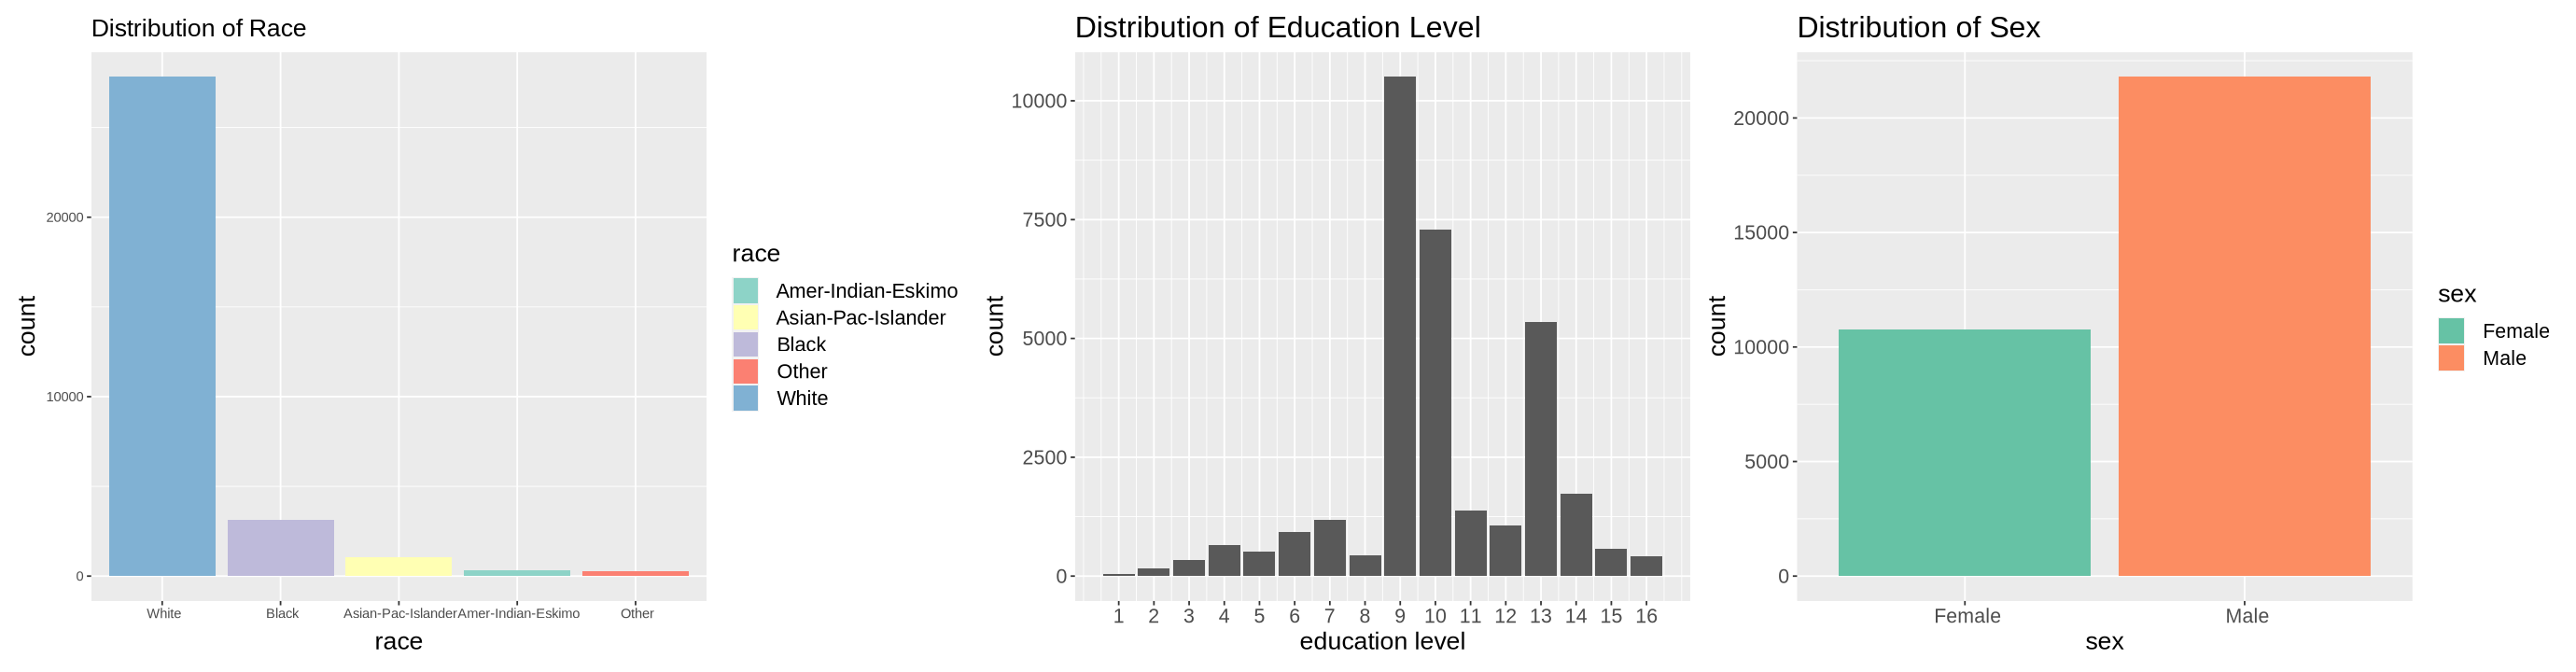

In [8]:
options(repr.plot.width = 23, repr.plot.height = 6)

# Count the number and proportion of individuals in race to help order the bars in descending order
table_race <- count(adult_subset, race) |>
mutate(prop = round(n / nrow(adult), 3))

# Bar graph for race
bar_race <- ggplot(table_race, aes(x = reorder(race, -n), y = n, fill = race)) + 
    geom_bar(stat = "identity") +
    labs(title = "Distribution of Race", x = "race", y = "count")+ 
    scale_fill_brewer(palette = "Set3") +
    theme(plot.title = element_text(size = 16),
          axis.title.x = element_text(size = 16),
          axis.title.y = element_text(size = 16),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 13))



# Bar graph for education level
bar_education <- ggplot(adult_subset, aes(x = education.num)) + 
    geom_bar() +
    labs(title = "Distribution of Education Level", x = "education level") +
    scale_x_continuous(breaks = seq(1, 16, by = 1)) +
    theme(text = element_text(size = 16))
                       

# Bar graph for sex
bar_sex <- ggplot(adult_subset, aes(x = sex, fill = sex)) + 
    geom_bar() +
    labs(title = "Distribution of Sex") + 
    scale_fill_brewer(palette = "Set2") +
    theme(text = element_text(size = 16))


(bar_race | bar_education | bar_sex) + plot_layout(ncol = 3)


The plots above provide insights into the overall trends of each factor. The dataset predominantly consists of individuals of White racial background, and individuals with education levels of 9, 10, and 11. Additionally, there are approximately twice as many males as there are females in the dataset.

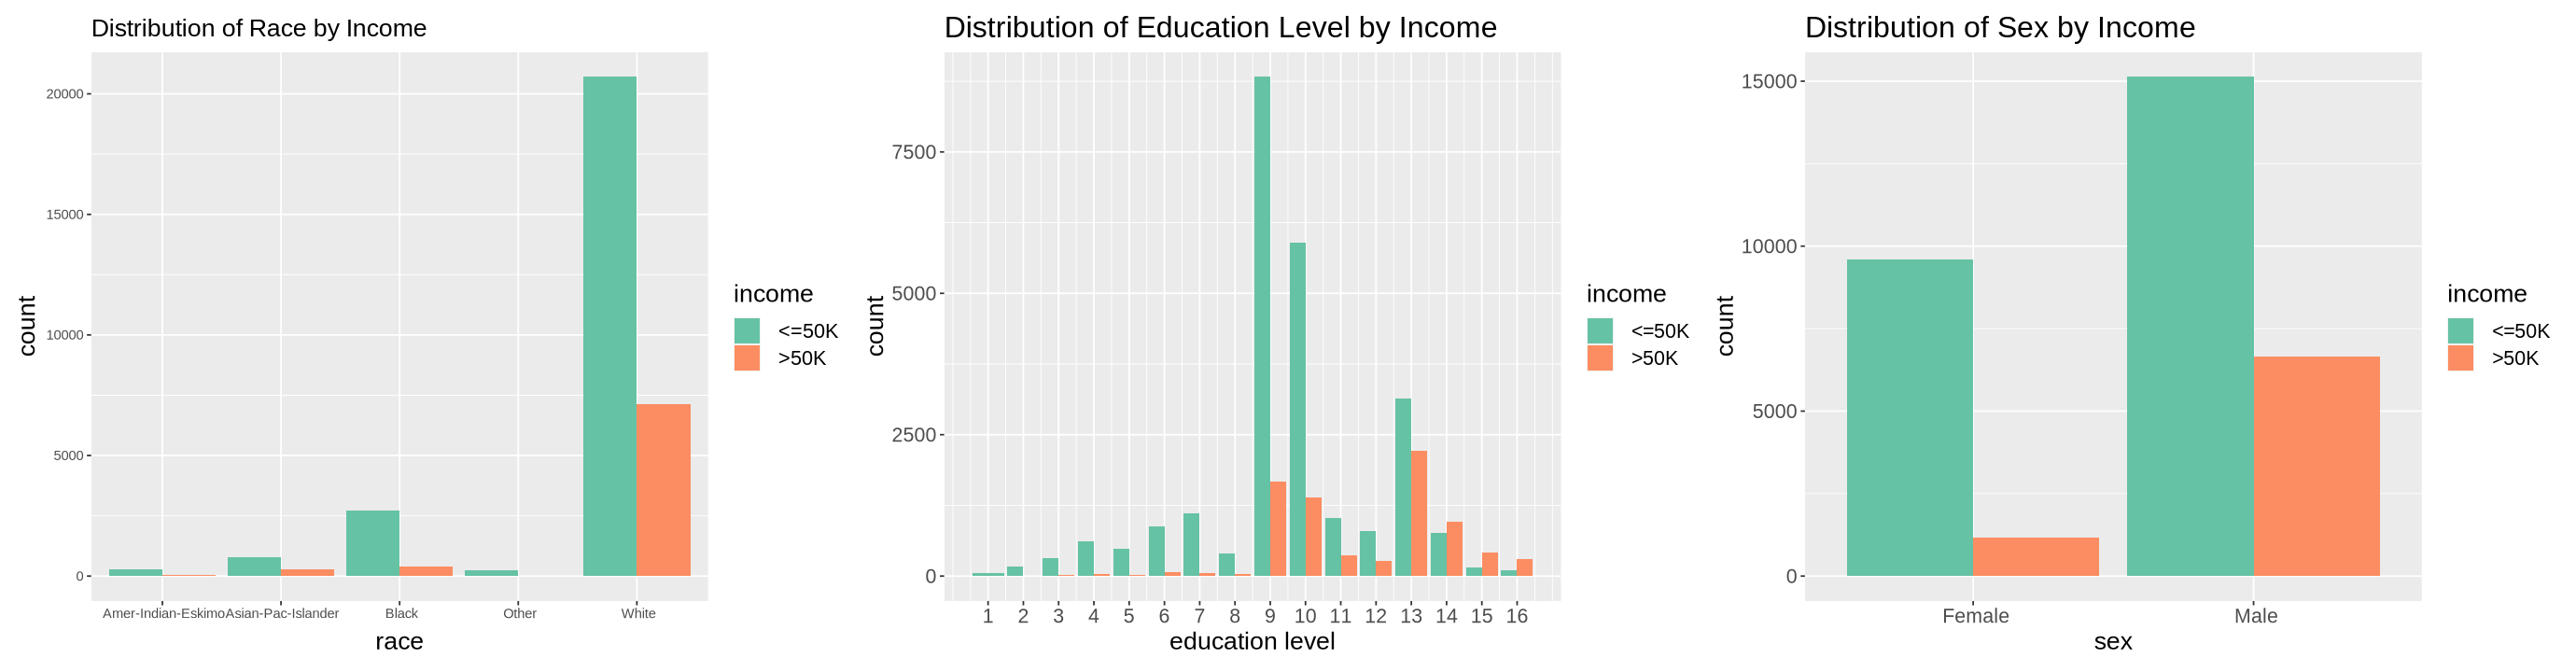

In [9]:
options(repr.plot.width = 23, repr.plot.height = 6)


# Bar plot for race by income
plot_race_income <- ggplot(adult_subset, aes(x = race, fill = income)) + 
    geom_bar(position = "dodge") +
    labs(title = "Distribution of Race by Income") + 
    scale_fill_brewer(palette = "Set2") +
    theme(plot.title = element_text(size = 16),
          axis.title.x = element_text(size = 16),
          axis.title.y = element_text(size = 16),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 13))


# Bar plot for education level by income
plot_education_income <- ggplot(adult_subset, aes(x = education.num, fill = income)) + 
    geom_bar(position = "dodge") +
    labs(title = "Distribution of Education Level by Income", x = "education level") + 
    scale_fill_brewer(palette = "Set2") + 
    scale_x_continuous(breaks = seq(1, 16, by = 1)) +
    theme(text = element_text(size = 16))


# Bar plot for sex by income
plot_sex_income <- ggplot(adult_subset, aes(x = sex, fill = income)) + 
    geom_bar(position = "dodge") +
    labs(title = "Distribution of Sex by Income") + 
    scale_fill_brewer(palette = "Set2") +
    theme(text = element_text(size = 16))


(plot_race_income | plot_education_income | plot_sex_income) + plot_layout(ncol = 3)

Here, we compare the distribution of each factor by `income` using groupd bar charts. 
<br>When comparing those earning above and below 50K, it appears that a higher proportion of White individuals earn above 50K compared to other races. Additionally, in education level 1, there are no individuals earning above 50K, while in levels 14, 15, and 16, there are more individuals earning above 50K than those earning below. Moreover, it seems that a higher proportion of males earn above 50K compared to females.

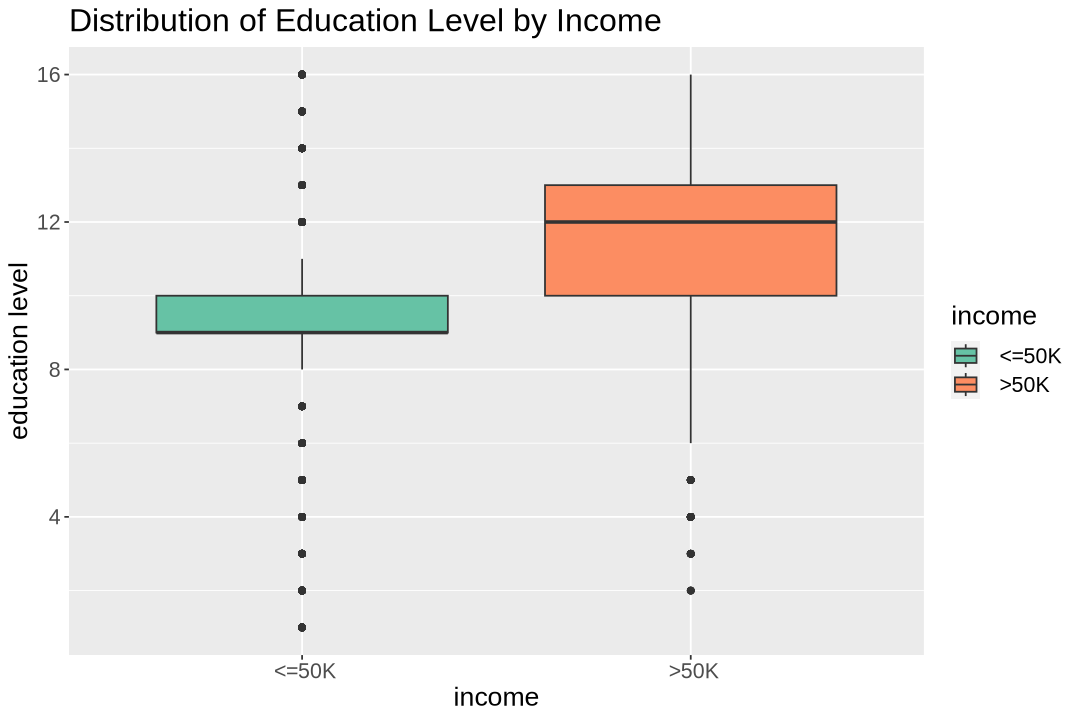

In [10]:
# Create a box plot to compare the distribution of education level by income
options(repr.plot.width = 9, repr.plot.height = 6)

box_education_income <- ggplot(adult_subset, aes(x = income, y = education.num, fill = income)) + 
    geom_boxplot() +
    labs(title = "Distribution of Education Level by Income", x = "income", y = "education level") + 
    scale_fill_brewer(palette = "Set2") +
    theme(text = element_text(size = 16))

box_education_income

With the boxplots, it becomes more apparent that individuals with higher education levels tend to have higher incomes (>50K). This is evident from the fact that, for incomes <=50K, the lower quartile and median education levels are 9, and the upper quartile is 10. Conversely, for incomes >50K, the lower quartile is 10, the median is 12, and the upper quartile is 13.


This series of bar plots and a boxplot visually illustrates the distribution of individuals across income brackets within various demographic categories (race, education level, sex). By analyzing the patterns in these plots, we can gain insights into how income is distributed across different demographic groups and identify potential correlations between demographic factors and income.

### Method Proposal: Additive Logistic Regression

#### Why this method is appropriate
Logistic regression is a suitable method for addressing the research question because it allows for examining the relationship between demographic factors (race, education level, and sex) and a binary outcome variable (income >50K or <=50K). Given that the response variable (income) is binary and the predictors are a mix of categorical and continuous variables, logistic regression can effectively model the probability of earning more than $50,000 based on the demographic predictors. This method is appropriate because it provides a framework for understanding how these demographic factors influence the likelihood of having income above a certain threshold. Additionally, the additive model allows us to focus on examining the individual effects of each explanatory variable.

#### Assumptions

To apply logistic regression, several assumptions need to be met:

1. **Binary Response:** The response variable must be dichotomous, meaning it has only two possible outcomes or can be aggregated into two categories.
2. **Independence:** The observations must be independent of each other; the outcome of one observation does not influence the outcome of another observation.
3. **Variance Structure:** The variance of a binomial random variable is $np(1-p)$, which is highest when the probability of success is 0.5.
4. **Linearity:** The relationship between the logarithm of the odds ratio, represented as $log(\frac{p}{1-p})$, and $x$ must be linear.


#### Potential Limitations or Weaknesses

Despite its usefulness, logistic regression has some limitations:

1. **Sample Bias:** Logistic regression results may be biased if the sample is not representative of the population of interest. For example, if certain demographic groups are overrepresented or underrepresented in the sample, it may affect the generalizability of the results.
2. **Model Complexity:** The regression assumes a linear relationship between the log odds of the response variable and the predictor variables. If the true relationship is nonlinear, logistic regression may not accurately capture the underlying pattern.
3. **Assumption of Independence:** While logistic regression assumes independence of observations, in practice, data points may be correlated due to clustering or repeated measures. Violation of the independence assumption can lead to incorrect confidence intervals and p-values.

#### The model

The response variable can only take the values 0 or 1. The binary response $Y_i$, the proportion of income of >50K would be: 

$$
Y_i =
\begin{cases}
1 \; \; \; \; \mbox{if the $i$th observation is >50K},\\
0 \; \; \; \; 	\mbox{otherwise}
\end{cases}
$$


Logistic regression estimates the probability of success $p_i$ based on a set of covariates, but it does not directly express it as a linear function of those covariates. Instead, we express $p_i$ into an unrestricted scale known as the log-odds:

$$
\mbox{logit}(p_{i,\texttt{income}}) = \log \bigg( \frac{p_{i, \texttt{income}}}{1 - p_{i,\texttt{income}}}\bigg) = \beta_0 + \beta_1 X_{i, \texttt{race Asian-Pac-Islander}} + \beta_2 X_{i,\texttt{race Black}} + \beta_3 X_{i,\texttt{race Other}} + \beta_4 X_{i,\texttt{race White}} + \beta_5 X_{i,\texttt{education.num}} + \beta_6 X_{i,\texttt{sex Male}}
$$

or equivalently

$$
p_{i,\texttt{income}} = \frac{e^{\beta_0 + \beta_1 X_{i,\texttt{race Asian-Pac-Islander}} + \beta_2 X_{i,\texttt{race Black}} + \beta_3 X_{i,\texttt{race Other}} + \beta_4 X_{i,\texttt{race White}} + \beta_5 X_{i,\texttt{education.num}} + \beta_6 X_{i,\texttt{sex Male}}}}{1 + e^{\beta_0 + \beta_1 X_{i,\texttt{race Asian-Pac-Islander}} + \beta_2 X_{i,\texttt{race Black}} + \beta_3 X_{i,\texttt{race Other}} + \beta_4 X_{i,\texttt{race White}} + \beta_5 X_{i,\texttt{education.num}} + \beta_6 X_{i,\texttt{sex Male}}}}.
$$


<br>
Each coefficient represents the effect of the corresponding explanatory variable on the log-odds of the outcome variable compared to a reference category, while holding all other variable constant.

- $\beta_0$: The intercept term represents the baseline log-odds of having income >50K versus <=50K when all other predictor variables are zero.
- $\beta_1$: The difference in log-odds between individuals of Asian-Pacific-Islander race and the reference group (i.e., Asian-Pacific-Islander vs. American-Indian-Eskimo)
- $\beta_2$: The difference in log-odds between individuals of Black race and the reference group.
- $\beta_3$: The difference in log-odds between individuals of Other race and the reference group.
- $\beta_4$: The difference in log-odds between individuals of White race and the reference group.
- $\beta_5$: The change in log-odds associated with a one-unit increase in education level.
- $\beta_6$: The difference in log-odds between males and females.

##### **Hypothesis Testing**

Hypothesis testing will be conducted to determine whether there is a significant association between demographic factors and income levels with a significance level, $\alpha$, of 5%. 


Our hypothesis test is as follows:

\begin{gather*}
H_0: \beta_1 = \beta_2 = \beta_3 = \beta_4 = \beta_5 = \beta_6 = 0\\
H_a: \text{At least one of $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, $\beta_5$, and $\beta_6$ is not equal to 0.}
\end{gather*}


This will be accomplished using the Wald statistic $z_j$ where $j$ is 1, 2, 3, 4, 5, or 6.

$$z_j = \frac{\hat{\beta}_j}{\mbox{SE}\left(\hat{\beta}_j\right)}$$

where $\mbox{SE}\left(\hat{\beta}_j\right)$ is the standard error of the estimated coefficient.

This has an approximately standard normal distribution under $H_0$ when the sample size $n$ is large enough.


##### **Confidence Intervals**

A confidence interval will be calculated to provide a range of plausible values for the true value. This will be calculated with a level of 95% using the formula:

$$ CI = \hat{\beta}_j \pm z_{\alpha/2}\mbox{SE}\left(\hat{\beta}_j\right),$$

where $z_{\alpha/2}$ is the upper $\alpha/2$ quantile of the standard normal distribution.


Using this approach allows us to efficiently perform hypothesis testing and create confidence intervals, helping us understand the connections between demographic factors and income across the wider population.

### Implementation of a Proposed Model

The computational code implementing the proposed method along with the results table is provided below:

In [15]:
# replaces the levels >50K and <=50K with the numerical values 1 and 0
income_num <- adult |>
            mutate(income = ifelse(str_trim(income) == ">50K", 1, 0)) 

head(income_num)

# counts the frequency of each unique value in the income variable (check if they are converted successfully)
income_counts <- table(income_num$income)

income_counts

age workclass         fnlwgt education  education.num marital.status     
1 39   State-gov         77516  Bachelors 13             Never-married     
2 50   Self-emp-not-inc  83311  Bachelors 13             Married-civ-spouse
3 38   Private          215646  HS-grad    9             Divorced          
4 53   Private          234721  11th       7             Married-civ-spouse
5 28   Private          338409  Bachelors 13             Married-civ-spouse
6 37   Private          284582  Masters   14             Married-civ-spouse
  occupation         relationship   race   sex     capital.gain capital.loss
1  Adm-clerical       Not-in-family  White  Male   2174         0           
2  Exec-managerial    Husband        White  Male      0         0           
3  Handlers-cleaners  Not-in-family  White  Male      0         0           
4  Handlers-cleaners  Husband        Black  Male      0         0           
5  Prof-specialty     Wife           Black  Female    0         0           
6  Exec-managerial    Wife           White  Female    0         0           
  hours.per.week native.country income
1 40              United-States 0     
2 13              United-States 0     
3 40              United-States 0     
4 40              United-States 0     
5 40              Cuba          0     
6 40              United-States 0


    0     1 
24720  7841 

In [21]:
# generates the additive logistic regression model
log_add <- glm(formula = income ~ race + education.num + sex, 
               data = income_num, 
               family = "binomial")


# obtains a summary table of results using the function tidy()
# mutates the exponentiated coefficients and round and rounds to 3 decimal places

tidy_conf_int_exp <- 
        tidy(log_add,
             conf.int = TRUE) |>
        mutate(exp.estimate = exp(estimate)) |>
        mutate_if(is.numeric, round, 3)

tidy_conf_int_exp

term                    estimate std.error statistic p.value conf.low
1 (Intercept)             -6.629   0.201     -33.003   0.000   -7.037  
2 race Asian-Pac-Islander  0.338   0.202       1.673   0.094   -0.047  
3 race Black               0.118   0.195       0.604   0.546   -0.252  
4 race Other              -0.345   0.292      -1.180   0.238   -0.926  
5 race White               0.629   0.187       3.365   0.001    0.276  
6 education.num            0.369   0.007      56.789   0.000    0.357  
7 sex Male                 1.335   0.036      36.951   0.000    1.265  
  conf.high exp.estimate
1 -6.248    0.001       
2  0.747    1.402       
3  0.514    1.125       
4  0.224    0.709       
5  1.010    1.875       
6  0.382    1.447       
7  1.406    3.800

#### Interpretation of the Results

The logistic regression analysis indicates that education level and sex are strongly associated with income levels, as indicated by their significant coefficients (p-value < 0.001). Specifically, for every one-unit increase in education level, the odds of having an income >50K increase by approximately 1.447 times, and being male increases the odds by about 3.8 times compared to being female. However, the association between race and income is less clear, with only the "White" category showing a significant positive association with income (odds ratio $\approx$ 1.875, p-value $\approx$ 0.001). Given the statistical significance of education level and sex coefficients, we reject the null hypothesis that all coefficients are zero, suggesting that at least one of these factors has a significant effect on income.

### Reference
Becker,Barry and Kohavi,Ronny. (1996). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.